# Quick start guide

## Introduction

Ovids3d is used to display data clouds obtained with SITELLE. Its input is an (N, 4) array of (X, Y, Z, F) values, where X, Y, Z are the
coordinates of the points in the 3D space and F their brightness value.

Note that everything will work better if X,Y,Z are set relative to the origin (0,0,0) and are smaller than 10. The flux also should be scaled between 0 and 100.

In [2]:
import numpy as np
import astropy.io.fits as pyfits

data = pyfits.getdata('m1_xyzf.fits') # this is the structure of M1 (the Crab Nebula)
print('data shape:', data.shape)
data

data shape: (416573, 4)


array([[-1.4849614 , -0.5340557 , -0.44408262,  1.6649649 ],
       [-1.4798031 , -0.5340557 , -0.44482437,  1.6898476 ],
       [-1.4720654 , -0.6630162 ,  0.14847632,  1.4297874 ],
       ...,
       [ 0.17089058,  0.45378122, -0.86171067, 18.845125  ],
       [ 0.40301937, -0.6475409 , -0.77557236,  8.98969   ],
       [ 0.40559858, -0.6475409 , -0.7777203 ,  7.1513886 ]],
      dtype=float32)

Once the data is obtained a simple script like this one can be run to explore the data and create a first vizualisation. **The following is not intended to run with Jupyter. It must be saved in a separate file (e.g. `run.py`) and run with `python run.py`.**

```python
from ovids3d.engine import World
from panda3d.core import loadPrcFileData, ConfigVariableBool

x, y = 1920, 1080 # set the shape of the rendering window
path = 'm1_xyzf.fits' # path to your data file in FITS format
cmap = 'afmhot' # colormap for the mapping of brightness values (see: https://matplotlib.org/stable/gallery/color/colormap_reference.html)



loadPrcFileData('', 'win-size {} {}'.format(
    int(x), int(y)))

ConfigVariableBool("fullscreen").setValue(1)


config_params = {
    'title': 'Crab Nebula', # Title of the vizualisation
    'center_name': 'center', # name of the center (e.g. the name of a star)
    'space_unit': 'pc', # space unit
    'spacescale': 1000, # display scale (set it to a lower value if pixels are too small)
    }

w = World(**config_params)
w.add_map(path, cmap)
w.base.run()
```

To navigate through the displayed object you may use the following keys of the keyboard:

* 'W': front
* 'S': back
* 'A': left
* 'D': right
* 'Q': roll on left
* 'E': roll on right
* 'R': up
* 'F': down

You have to use the mouse to change the viewer direction: left-cliking on any part of the display with move the view in this direction.

You can also change the field of view with the mouse wheel.



## Working with raw SITELLE data

In general, with an instrument like SITELLE, we obtain maps of the flux and velocity in at least one emission line. Let's start with these two maps obtained after a quick estimation of these parameters on M1.

In [2]:
import numpy as np
import astropy.io.fits as pyfits

flux = pyfits.getdata('Crab-nebula_SN3.SpectralCube.estimated_Halpha.0.fits') # Flux map
vel = pyfits.getdata('Crab-nebula_SN3.SpectralCube.estimated_velocity.0.fits') # Velocity map

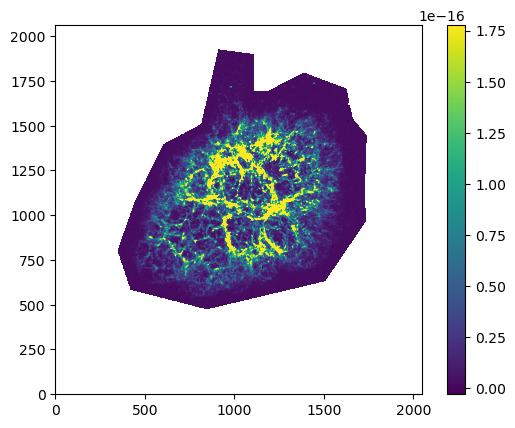

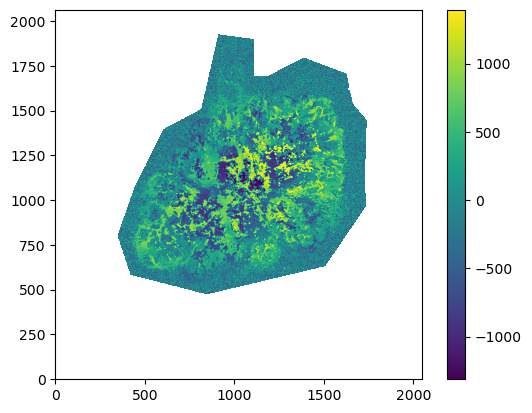

In [12]:
import pylab as pl
vmin, vmax = np.nanpercentile(flux, (5, 95))
pl.imshow(flux, origin='lower', vmin=vmin, vmax=vmax)
pl.colorbar()

pl.figure()
vmin, vmax = np.nanpercentile(vel, (5, 95))
pl.imshow(vel, origin='lower', vmin=vmin, vmax=vmax)
pl.colorbar()

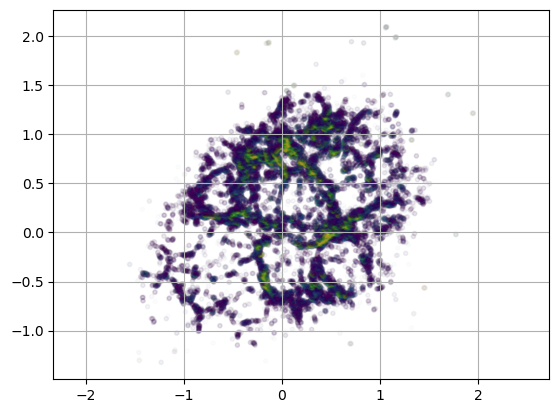

In [31]:
# let's filter the points by flux

oks = (flux > np.nanpercentile(flux, 90))

# X and Y coordinates can be retrieved from the pixels coordinates, the origin being the center of the frame
Y, X = np.nonzero(oks)
X = X.astype(float) - flux.shape[0] / 2
Y = Y.astype(float) - flux.shape[1] / 2

## X and Y values are better rescaled on a scale of 1
xy_scale = np.nanpercentile(X, 95)
X /= xy_scale
Y /= xy_scale

# flux values only have to be rescaled
F = flux[oks]

vmin, vmax = np.nanpercentile(F, (5,95))
pl.scatter(X,Y, c=F, alpha=0.01, marker='.', vmin=vmin, vmax=vmax)
pl.axis('equal')
pl.grid()

In [32]:
# the Z position will indicate the velocity, in our case we just haeve to rescale it to be of the order of 1
Z = vel[oks]
Z /= np.nanpercentile(Z, 95)

In [35]:
arr = np.array((X,Y,Z,F))
pyfits.writeto('m1_fast_xyzf.fits', arr, overwrite=True)